Imagen de la posible base de datos.

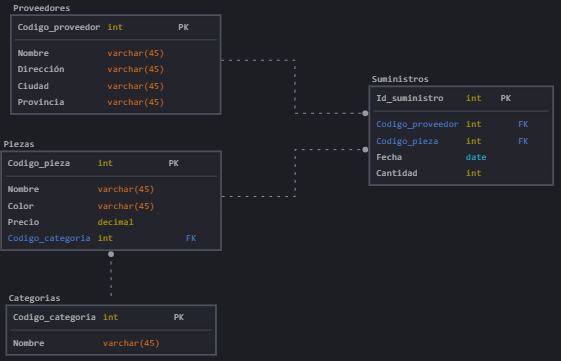

In [56]:
import pandas as pd
import sqlite3

In [57]:
# Creación de la conexión de la base de datos y del cursor.
conn = sqlite3.connect('proveedores.db')
cursor = conn.cursor()

# Función para realizar queries.
def sql_query(query):
    cursor.execute(query)
    if query.lower().strip().startswith("select "):
        ans = cursor.fetchall()
        names = [description[0] for description in cursor.description]
        return pd.DataFrame(ans,columns=names)
    return None

In [58]:
# Tabla proveedores.
cursor.execute("DROP TABLE IF EXISTS Proveedores") #Para volver a ejecutar la celda y que no de error de que ya existe.

query_create = '''
CREATE TABLE Proveedores(
    Codigo_proveedor INT PRIMARY KEY,
    Nombre VARCHAR(45) NOT NULL,
    Direccion VARCHAR(45),
    Ciudad VARCHAR(45),
    Provincia VARCHAR(45)
)
'''
cursor.execute(query_create)

# Valores para proveedores.
proveedores = {
    101: ('Proveedor A', 'Calle Falsa 123', 'Madrid', 'Madrid'),
    102: ('Proveedor B', 'Avenida Central 456', 'Barcelona', 'Cataluña'),
    103: ('Proveedor C', 'Calle Mayor 789', 'Valencia', 'Comunidad Valenciana'),
    104: ('Proveedor D', 'Calle de la Luna 101', 'Sevilla', 'Andalucía'),
    105: ('Proveedor E', 'Avenida de la Paz 202', 'Zaragoza', 'Aragón')
}

for indice,(clave,valores) in enumerate(proveedores.items()):
    id
    codigo = valores[0]
    direccion = valores[1]
    ciudad = valores[2]
    provincia = valores[3]
    query = f"INSERT INTO Proveedores (Codigo_proveedor, Nombre, Direccion, Ciudad, Provincia) VALUES ({clave},'{codigo}','{direccion}','{ciudad}','{provincia}')"
    cursor.execute(query)

In [59]:
# Tabla categorias.
cursor.execute("DROP TABLE IF EXISTS Categorias")

query_create = '''
CREATE TABLE Categorias(
    Codigo_categoria INT PRIMARY KEY,
    Nombre VARCHAR(45)
)
'''
cursor.execute(query_create)

# Valores categorías.
categorias = {
    1: ("Electrónica"),
    2: ("Mecánica"),
    3: ("Hogar")
}

for indice, (clave, valores) in enumerate(categorias.items()):
    nombre_categoria = valores
    query = f"INSERT INTO Categorias (Codigo_categoria, Nombre) VALUES ({clave}, '{nombre_categoria}')"
    cursor.execute(query)


In [ ]:
# Tabla piezas.
cursor.execute("DROP TABLE IF EXISTS Piezas")

query_create = '''
CREATE TABLE Piezas(
    Codigo_pieza INT PRIMARY KEY,
    Nombre VARCHAR(45) NOT NULL,
    Color VARCHAR(45),
    Precio FLOAT NOT NULL,
    Codigo_categoria INT,
    FOREIGN KEY (Codigo_categoria) REFERENCES Categorias(Codigo_categoria)
)
'''
cursor.execute(query_create)

# Valores piezas.
piezas = {
    1546: ('Pieza A', 'Rojo', 10.5, 1),
    2753: ('Pieza B', 'Azul', 15.0, 2),
    34: ('Pieza C', 'Verde', 8.5, 3)
}

# Insertar cada fila en Piezas
for indice, (clave, valores) in enumerate(piezas.items()):
    nombre_pieza = valores[0]
    color = valores[1]
    precio = valores[2]
    codigo_categoria = valores[3]
    query = f"INSERT INTO Piezas (Codigo_pieza, Nombre, Color, Precio, Codigo_categoria) VALUES ({clave}, '{nombre_pieza}', '{color}', {precio}, {codigo_categoria})"
    cursor.execute(query)


In [ ]:
# Tabla suministros.
cursor.execute("DROP TABLE IF EXISTS Suministros")
query_create = '''
CREATE TABLE Suministros(
    Id_suministros INT PRIMARY KEY,
    Codigo_proveedor INT,
    Codigo_pieza INT,
    Fecha DATE,
    Cantidad INT,
    FOREIGN KEY (Codigo_proveedor)REFERENCES Proveedores(Codigo_proveedor),
    FOREIGN KEY (Codigo_pieza) REFERENCES Piezas(Codigo_pieza)
)
'''
cursor.execute(query_create)

suministros = {
    1: (101, 1, '2024-01-10', 50),
    2: (102, 2, '2024-02-15', 30),
    3: (103, 3, '2024-03-20', 100),
    4: (104, 1, '2024-04-25', 75),
    5: (105, 2, '2024-05-30', 120)
}

# Insertar cada fila en Suministros
for indice, (clave, valores) in enumerate(suministros.items()):
    codigo_proveedor = valores[0]
    codigo_pieza = valores[1]
    fecha = valores[2]
    cantidad = valores[3]
    query = f"INSERT INTO Suministros (Id_suministros, Codigo_proveedor, Codigo_pieza, Fecha, Cantidad) VALUES ({indice+1}, {codigo_proveedor}, {codigo_pieza}, '{fecha}', {cantidad})"
    cursor.execute(query)


In [62]:
# Actualizar los cambios realizados en el df.
conn.commit()

In [63]:
pd.read_sql("SELECT * FROM Proveedores", conn)


,Codigo_proveedor,Nombre,Direccion,Ciudad,Provincia
0,101,Proveedor A,Calle Falsa 123,Madrid,Madrid
1,102,Proveedor B,Avenida Central 456,Barcelona,Cataluña
2,103,Proveedor C,Calle Mayor 789,Valencia,Comunidad Valenciana
3,104,Proveedor D,Calle de la Luna 101,Sevilla,Andalucía
4,105,Proveedor E,Avenida de la Paz 202,Zaragoza,Aragón


In [64]:
pd.read_sql("SELECT * FROM Categorias", conn)


,Codigo_categoria,Nombre
0,1,Electrónica
1,2,Mecánica
2,3,Hogar


In [65]:
pd.read_sql("SELECT * FROM Piezas", conn)


,Codigo_pieza,Nombre,Color,Precio,Codigo_categoria
0,1546,Pieza A,Rojo,10.5,1
1,2753,Pieza B,Azul,15.0,2
2,34,Pieza C,Verde,8.5,3


In [66]:
pd.read_sql("SELECT * FROM Suministros", conn)


,Id_suministros,Codigo_proveedor,Codigo_pieza,Fecha,Cantidad
0,1,101,1,2024-01-10,50
1,2,102,2,2024-02-15,30
2,3,103,3,2024-03-20,100
3,4,104,1,2024-04-25,75
4,5,105,2,2024-05-30,120


In [67]:
conn.close()